In [1]:
#imporing necessary libraries
import numpy as np
import pandas as pd
import cv2
from sklearn.model_selection import train_test_split

In [2]:
#reading input images from folder
image_list=[]
for i in range(1,500):
    img=cv2.imread("C:/Users/nagarjun/Desktop/datset/trail(cat)/cat."+str(i)+".jpg")
    resized_image=cv2.resize(img,(64,64))
    image_list.append(resized_image)
for i in range(1,500):
    img=cv2.imread("C:/Users/nagarjun/Desktop/datset/trail(dog)/dog."+str(i)+".jpg")
    resized_image=cv2.resize(img,(64,64))
    image_list.append(resized_image)

In [3]:
#converting list of image date to numpy array
X=np.array(image_list)

In [4]:
# creating target column that is Y
Y=[1 for i in range(0,499)]
for i in range(0,499):
    Y.append(0)

In [5]:
# converting list to numpy array and reshaping 
Y=np.array(Y)
Y=Y.reshape((len(Y),1))

In [6]:
#splitting up of input data to train and test data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=43)

In [7]:
#printing shape of train and test data
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(898, 64, 64, 3)
(898, 1)
(100, 64, 64, 3)
(100, 1)


In [8]:
# transposing train and test data to fit to the model
X_train=X_train.T
X_test=X_test.T
Y_train=Y_train.T
Y_test=Y_test.T

In [9]:
#After transposing the train and test data
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)


(3, 64, 64, 898)
(1, 898)
(3, 64, 64, 100)
(1, 100)


In [10]:
# for convent reshaping the image data to a flatten data
X_train=X_train.reshape((64*64*3,X_train.shape[3]))
X_test=X_test.reshape((64*64*3,X_test.shape[3]))

In [11]:
# After flattening of data 
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(12288, 898)
(1, 898)
(12288, 100)
(1, 100)


In [12]:
#to standardize the data
X_train=X_train/255.
X_test=X_test/255.

In [13]:
# binary classification activation function
def sigmoid(z):
    a=1/(1+np.exp(-z))
    return a

In [14]:
# initializeing the input, hidden and , output layers
def layer_sizes(X, Y):
    n_x = X.shape[0]
    n_h1 = 10
    n_h2=10
    n_y = Y.shape[0] # size of output layer
    return (n_x, n_h1,n_h2, n_y)

In [15]:
(n_x, n_h1,n_h2, n_y) = layer_sizes(X_train, Y_train)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the hidden layer 1 is: n_h = " + str(n_h1))
print("The size of the hidden layer 2 is: n_h = " + str(n_h2))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 12288
The size of the hidden layer 1 is: n_h = 10
The size of the hidden layer 2 is: n_h = 10
The size of the output layer is: n_y = 1


In [16]:
# initializing the weights randomly and bias to zero by considering shape of each layer
def initialize_parameters(n_x, n_h1,n_h2, n_y):
    W1 =np.random.randn(n_h1,n_x)
    W1=W1/100
    b1 =np.zeros(shape=(n_h1,1))
    W2 =np.random.randn(n_h2,n_h1)
    W2=W2/100
    b2 =np.zeros(shape=(n_h2,1))
    W3 = np.random.randn(n_y,n_h2)
    W3=W3/100
    b3 = np.zeros(shape=(n_y,1))
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3":W3,
                  "b3":b3
                 }
    return parameters

In [17]:
parameters =initialize_parameters(X_train.shape[0], 10, 10, Y_train.shape[0])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))
print("W3 = " + str(parameters["W3"]))
print("b3 = " + str(parameters["b3"]))
print(np.power(parameters['W1'],2).sum())
print(np.power(parameters['W2'],2).sum())
print(np.power(parameters['W3'],2).sum())

W1 = [[ 0.02064748 -0.02075724 -0.01992571 ...  0.00306123 -0.00267504
  -0.00775572]
 [-0.00149526  0.01223424 -0.00981205 ... -0.01168336  0.00407487
  -0.01018363]
 [ 0.0063108  -0.00646759 -0.0018477  ...  0.00555968 -0.00537397
  -0.00992752]
 ...
 [ 0.0058372  -0.02498205 -0.00426737 ... -0.00335041  0.00904825
   0.00919729]
 [ 0.00203307  0.01445225 -0.0125795  ... -0.00955149 -0.00721891
  -0.0057923 ]
 [ 0.00038059  0.00604228 -0.00153943 ...  0.00131001 -0.00603136
  -0.0145878 ]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
W2 = [[ 4.88510548e-03 -9.11244721e-03  4.25390784e-03 -3.28272391e-04
   7.78935618e-04  1.16836590e-02  9.79646952e-03 -8.26291229e-03
   4.02974501e-04  2.66379596e-02]
 [ 2.24849244e-03 -1.65126018e-03  9.01914282e-03 -7.72929343e-03
  -9.60575148e-04 -1.20593806e-02 -9.29889403e-03 -1.00480443e-02
   8.38916543e-03 -2.44238108e-03]
 [-1.23915346e-03 -3.78517071e-03 -1.16353251e-03  9.80678640e-04
  -1.32422792e-02  4.26890600e-0

In [18]:
#printing shape of weight and bias arrays
print("W1 = " + str(parameters["W1"].shape))
print("b1 = " + str(parameters["b1"].shape))
print("W2 = " + str(parameters["W2"].shape))
print("b2 = " + str(parameters["b2"].shape))
print("W3 = " + str(parameters["W3"].shape))
print("b3 = " + str(parameters["b3"].shape))

W1 = (10, 12288)
b1 = (10, 1)
W2 = (10, 10)
b2 = (10, 1)
W3 = (1, 10)
b3 = (1, 1)


In [19]:
# forward propagation to compute each layer output and given that as input to next layer
def forward_propagation(X, parameters):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    Z1 = np.dot(W1,X)+b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1)+b2
    A2 = np.tanh(Z2)
    Z3=np.dot(W3,A2)+b3
    A3=sigmoid(Z3)
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2,
             "Z3":Z3,
             "A3":A3
            }
    
    return A3, cache

In [20]:
A3, cache = forward_propagation(X_train, parameters)

In [21]:
# Computing cost by considering last layer output from forward propagation
def compute_cost(A3, Y, parameters,lamb):
    m = Y.shape[1] 
    logprobs = np.multiply(np.log(A3),Y)+np.multiply((1-Y),np.log(1-A3))
    l2_re=np.power(parameters['W1'],2).sum()+np.power(parameters['W2'],2).sum()+np.power(parameters['W3'],2).sum()
    l2_sum=(lamb/(2*m))*l2_re
    cost= (-np.sum(logprobs)/m)
    cost = float(np.squeeze(cost)) 
    return cost

In [22]:
cost=compute_cost(A3,Y_train,parameters,0.4)
print("cost = ",cost)

cost =  0.6931443985462437


In [23]:
# Backpropagation used to compute gradients of each layers weights and bias
def backward_propagation(parameters, cache, X, Y,lamb):

    m = X.shape[1]
    W1 = parameters['W1']
    W2 = parameters['W2']
    W3 = parameters['W3']
    A1 = cache['A1']
    A2 = cache['A2']
    A3 = cache['A3']
    dZ3=A3-Y
    dW3=(1/m)*np.dot(dZ3,A2.T)+((lamb/m)*parameters['W3'].sum())
    db3 = (1/m)*np.sum(dZ3,axis=1,keepdims=True) 
    dZ2 = np.multiply(np.dot(W3.T,dZ3),(1-np.power(A2,2)))
    dW2 = (1/m)*np.dot(dZ2,A1.T)+((lamb/m)*parameters['W2'].sum())
    db2 = (1/m)*np.sum(dZ2,axis=1,keepdims=True)
    dZ1 = np.multiply(np.dot(W2.T,dZ2),(1-np.power(A1,2)))
    dW1 = (1/m)*np.dot(dZ1,X.T)+((lamb/m)*parameters['W1'].sum())
    db1 = (1/m)*np.sum(dZ1,axis=1,keepdims=True)    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2,
             "dW3":dW3,
             "db3":db3
            }
    
    return grads

In [24]:
grads = backward_propagation(parameters, cache, X_train, Y_train,lamb=0.3)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("db2 = "+ str(grads["db2"]))
print ("dW2 = "+ str(grads["dW3"]))
print ("db2 = "+ str(grads["db3"]))

dW1 = [[-0.00076232 -0.00076218 -0.00076252 ... -0.00076099 -0.00076108
  -0.00076107]
 [-0.00075975 -0.00076007 -0.00075962 ... -0.00076104 -0.00076103
  -0.00076109]
 [-0.00076157 -0.00076156 -0.00076157 ... -0.00076153 -0.00076154
  -0.00076154]
 ...
 [-0.0007612  -0.0007613  -0.00076119 ... -0.00076163 -0.0007616
  -0.00076158]
 [-0.00076099 -0.0007612  -0.00076089 ... -0.00076221 -0.00076218
  -0.00076219]
 [-0.00076399 -0.00076358 -0.00076437 ... -0.00076062 -0.00076084
  -0.00076057]]
db1 = [[-2.65773327e-07]
 [ 2.39398132e-06]
 [-1.23623051e-08]
 [-7.84266882e-07]
 [-3.83081321e-08]
 [-3.27756250e-06]
 [-5.70580997e-07]
 [ 3.06497662e-07]
 [-1.14664633e-08]
 [-1.93949699e-06]]
dW2 = [[-1.06555181e-04  9.86913340e-06  7.03221693e-05 -3.09666936e-05
   3.50197014e-05 -3.61714842e-06  4.83172381e-05 -4.73919583e-05
   6.24036980e-05  4.73862607e-06]
 [-1.86660271e-06  9.73909299e-07  2.44847917e-06 -2.20267962e-08
   1.58737119e-06  6.44862328e-07  1.91174927e-06 -4.22914837e-07
 

In [25]:
# Updating the the weights and bias by considering learning rate and gradients
def update_parameters(parameters, grads,alpha):
    
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']

    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    dW3 = grads['dW3']
    db3 = grads['db3']
 
    W1 = W1-alpha*dW1
    b1 = b1-alpha*db1
    W2 = W2-alpha*dW2
    b2 = b2-alpha*db2
    W3 = W3-alpha*dW3
    b3 = b3-alpha*db3
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3":W3,
                  "b3":b3
                 }
    
    return parameters

In [26]:
parameters = update_parameters(parameters, grads,alpha=0.003)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 0.02064977 -0.02075495 -0.01992342 ...  0.00306351 -0.00267276
  -0.00775344]
 [-0.00149298  0.01223652 -0.00980977 ... -0.01168108  0.00407715
  -0.01018135]
 [ 0.00631309 -0.0064653  -0.00184542 ...  0.00556196 -0.00537169
  -0.00992523]
 ...
 [ 0.00583949 -0.02497976 -0.00426508 ... -0.00334812  0.00905054
   0.00919958]
 [ 0.00203535  0.01445453 -0.01257722 ... -0.00954921 -0.00721663
  -0.00579001]
 [ 0.00038288  0.00604457 -0.00153714 ...  0.00131229 -0.00602908
  -0.01458552]]
b1 = [[ 7.97319980e-10]
 [-7.18194395e-09]
 [ 3.70869152e-11]
 [ 2.35280065e-09]
 [ 1.14924396e-10]
 [ 9.83268749e-09]
 [ 1.71174299e-09]
 [-9.19492986e-10]
 [ 3.43993898e-11]
 [ 5.81849096e-09]]
W2 = [[ 4.88542515e-03 -9.11247682e-03  4.25369687e-03 -3.28179491e-04
   7.78830558e-04  1.16836698e-02  9.79632456e-03 -8.26277011e-03
   4.02787289e-04  2.66379454e-02]
 [ 2.24849804e-03 -1.65126310e-03  9.01913548e-03 -7.72929336e-03
  -9.60579910e-04 -1.20593825e-02 -9.29889976e-03 -1.00480430e-02
   

In [29]:
# Final model with all function call
def model(X, Y, n_h1,n_h2, num_iterations,alpha,lamb, print_cost=False):
    parameters =initialize_parameters(X.shape[0],n_h1,n_h2,Y.shape[0])
    costs=[]
    for i in range(0, num_iterations+1):
        A3, cache = forward_propagation(X, parameters)
        cost = compute_cost(A3,Y,parameters,lamb)
        grads = backward_propagation(parameters, cache, X, Y,lamb)
        parameters = update_parameters(parameters, grads,alpha)
        if i%1000=0:
            costs.append(cost)
        if print_cost and i % 100 == 0:
            #print ("Cost after 100 iteration")
            print("cost after iteration "+str(i)+" is ",cost)
    return parameters,costs

SyntaxError: invalid syntax (<ipython-input-29-95ef9328c428>, line 10)

In [30]:
parameters,costs = model(X_train, Y_train, 20,20, num_iterations=20000,alpha=0.01,lamb=0.7, print_cost=True)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))
print("W3 = " + str(parameters["W3"]))
print("b3 = " + str(parameters["b3"]))

cost after iteration 0 is  0.693143099895212
cost after iteration 100 is  0.69313685942408
cost after iteration 200 is  0.6931309814089048
cost after iteration 300 is  0.6931259757060918
cost after iteration 400 is  0.6931214259593766
cost after iteration 500 is  0.6931170723733001
cost after iteration 600 is  0.6931127479775067
cost after iteration 700 is  0.6931083402802569
cost after iteration 800 is  0.6931037681572575
cost after iteration 900 is  0.6930989678157485
cost after iteration 1000 is  0.6930938841452338
cost after iteration 1100 is  0.6930884652414127
cost after iteration 1200 is  0.6930826587697568
cost after iteration 1300 is  0.6930764093589417
cost after iteration 1400 is  0.693069656524646
cost after iteration 1500 is  0.6930623328061456
cost after iteration 1600 is  0.6930543619022205
cost after iteration 1700 is  0.6930456566490806
cost after iteration 1800 is  0.693036116708701
cost after iteration 1900 is  0.693025625840939
cost after iteration 2000 is  0.693014

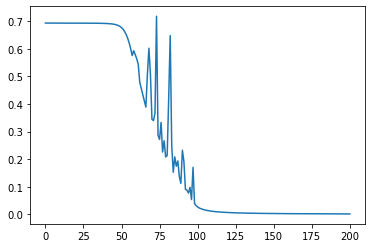

In [31]:
# plotting cost versus iterations
import matplotlib.pyplot as plt
plt.plot(costs)

In [32]:
# for predicting user input image
def predict(parameters, X):
    A2, cache = forward_propagation(X,parameters)
    predictions = A2    
    return predictions

In [33]:
predictions1=predict(parameters,X_train)

In [56]:
#printing accuracy 
print ('Accuracy of training model is: %f' % float((np.dot(Y_train,predictions1.T) + np.dot(1-Y_train,1-predictions1.T))/float(Y_train.size)*100) + '%')

Accuracy of training model is: 99.872758%


In [57]:
# reading user input image and reshapeing it into (64,64) size
img=cv2.imread("C:/Users/nagarjun/Desktop/datset/trail(cat)/cat.22.jpg")
resized_image=cv2.resize(img,(64,64))
X=np.array(resized_image)
X=X.reshape((64*64*3,1))
print(X.shape)

(12288, 1)


In [58]:
pred=predict(parameters,X)
pred

array([[0.8320726]])

In [59]:
if pred>0.5:
    print("It's a cat")
else:
    print("It's  not a cat")

It's a cat
